# Phase 2 – Data Collection & Preparation (Telco Customer Churn)

This notebook implements **Phase 2: Data Collection & Preparation** for the Telco Customer Churn dataset.

We will:

1. Load and validate the raw dataset  
2. Perform data preprocessing (missing values, duplicates, outliers, data types, formatting)  
3. Encode categorical variables and scale numeric features  
4. Save both **cleaned** and **model-ready** datasets

---

## 1. Setup and Library Imports

In this section, we import all the Python libraries needed for data loading, exploration, and preprocessing.


In [20]:
# Standard data libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Preprocessing utilities
from sklearn.preprocessing import StandardScaler

# Display options (optional)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)


## 2. Data Collection – Loading the Raw Dataset

The dataset file should be placed in the same folder as this notebook.

- **File name:** `WA_Fn-UseC_-Telco-Customer-Churn.csv`  
- **Access method:** Local CSV read using `pandas.read_csv()`

In [21]:
# Path to the raw data file (assumes same directory as the notebook)
DATA_PATH = "datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the raw dataset
df_raw = pd.read_csv(DATA_PATH)

# Make a working copy so we keep the original untouched
df = df_raw.copy()

df_raw.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Data Acquisition Validation

Here we confirm that the dataset:

- Can be read without errors  
- Has the expected structure (rows, columns)  
- Has no obvious corruption issues (e.g., wrong delimiter, broken encoding)

We will inspect:

- Shape (rows × columns)  
- Column names  
- Data types and non-null counts  
- Sample records  
- Basic descriptive statistics

In [22]:
# Shape of the dataset
print("Shape (rows, columns):", df.shape)

# Column names
print("\nColumn names:")
print(df.columns.tolist())

# Info: data types and non-null counts
print("\nDataFrame info:")
df.info()

# Preview first 5 rows
print("\nHead:")
display(df.head())

# Basic descriptive statistics for numeric columns
print("\nDescriptive statistics (numeric):")
display(df.describe())

# Descriptive statistics for object (categorical) columns
print("\nDescriptive statistics (categorical):")
display(df.describe(include="object"))


Shape (rows, columns): (7043, 21)

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Descriptive statistics (numeric):


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Descriptive statistics (categorical):


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## 4. Missing Data Handling

Steps:

1. **Identify missing values** in each column.  
2. Decide on an appropriate strategy (drop vs. impute).  
3. Apply imputation for relevant columns.

From experience with this dataset, `TotalCharges` may contain blank strings that become `NaN` when converted to numeric. We will:

- Convert `TotalCharges` to numeric with `errors="coerce"` so invalid entries become `NaN`.  
- Impute missing `TotalCharges` using the **median** value.


In [23]:
# 4.1 Check missing values before any transformations
print("Missing values per column (before):")
print(df.isna().sum())

# 4.2 Strip whitespace from column names to avoid subtle issues
df.columns = df.columns.str.strip()

# 4.3 Convert 'TotalCharges' to numeric
# Some entries may be empty strings; errors='coerce' turns them into NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("\nMissing values per column (after converting TotalCharges):")
print(df.isna().sum())

# 4.4 Impute missing TotalCharges with the median
median_total_charges = df["TotalCharges"].median()
df["TotalCharges"] = df["TotalCharges"].fillna(median_total_charges)

print("\nMissing values per column (after imputing TotalCharges):")
print(df.isna().sum())


Missing values per column (before):
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values per column (after converting TotalCharges):
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges 

## 5. Duplicate Removal

We check for duplicate customer records and remove them if present.


In [24]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicate rows if any exist
if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")

print("New shape after duplicate removal:", df.shape)


# duplicate_count = df.drop(columns=['customerID']).duplicated().sum()
# print(f"Number of duplicate rows (excluding customerID): {duplicate_count}")
#
# if duplicate_count > 0:
#     df = df.drop_duplicates(subset=df.columns.difference(['customerID']))
#     print("Duplicates removed.")
# else:
#     print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.
New shape after duplicate removal: (7043, 21)


## 6. Outlier Detection & Treatment

Outliers can distort statistical analyses and model training. Here we:

1. Select numeric columns  
2. Use the **Interquartile Range (IQR)** method to flag outliers  
3. Decide to **remove** rows with extreme outliers for this phase
4. No outliers detected

In [25]:
# Select numeric columns for outlier analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Compute IQR-based bounds for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nLower bounds:")
print(lower_bound)
print("\nUpper bounds:")
print(upper_bound)

# Create an outlier mask
outlier_mask = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)
print("\nNumber of rows flagged as outliers:", outlier_mask.sum())

# Option: Keep a version without outliers
df_no_outliers = df.loc[~outlier_mask].copy()
print("Shape after removing outliers:", df_no_outliers.shape)


Numeric columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Lower bounds:
SeniorCitizen        0.0000
tenure             -60.0000
MonthlyCharges     -46.0250
TotalCharges     -4674.3375
dtype: float64

Upper bounds:
SeniorCitizen        0.0000
tenure             124.0000
MonthlyCharges     171.3750
TotalCharges      8863.1625
dtype: float64

Number of rows flagged as outliers: 1142
Shape after removing outliers: (5901, 21)


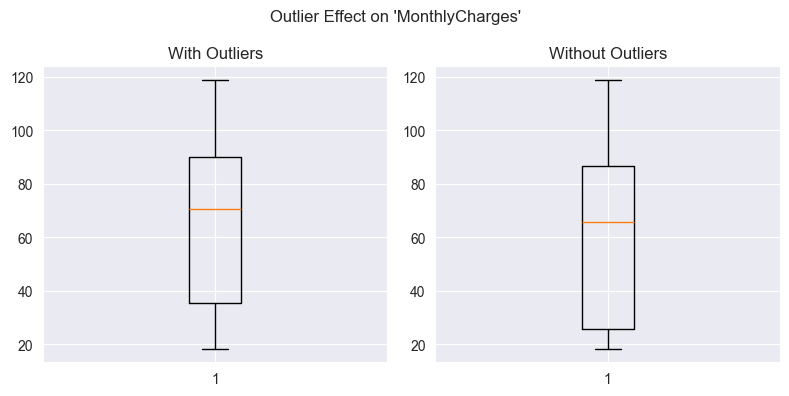

In [26]:
# Optional: Visualize distributions before/after outlier removal for a key column

column_to_plot = "MonthlyCharges"

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df[column_to_plot].dropna())
plt.title("With Outliers")

plt.subplot(1, 2, 2)
plt.boxplot(df_no_outliers[column_to_plot].dropna())
plt.title("Without Outliers")

plt.suptitle(f"Outlier Effect on '{column_to_plot}'")
plt.tight_layout()
plt.show()

## 7. Data Type Correction

We ensure that each column has an appropriate data type:

- `customerID`: string  
- `TotalCharges`, `MonthlyCharges`, `tenure`: numeric  
- `SeniorCitizen`: numeric but logically categorical (0/1)  
- Other service columns: categorical (object / category)


In [27]:
# Work with the no-outliers version from this point onward
df_clean = df_no_outliers.copy()

print("Data types before adjustments:")
print(df_clean.dtypes)

# Ensure 'customerID' is treated as string
df_clean["customerID"] = df_clean["customerID"].astype(str)

# Confirm numerical columns are numeric
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Treat SeniorCitizen as categorical (0/1)
df_clean["SeniorCitizen"] = df_clean["SeniorCitizen"].astype("int64")

print("\nData types after adjustments:")
print(df_clean.dtypes)


Data types before adjustments:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Data types after adjustments:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object


## 8. Formatting & Standardization

We clean up formatting inconsistencies, such as:

- Trimming whitespace in string values  
- Converting categorical text to a consistent case (e.g., lowercase)

This helps avoid duplicated categories like `"Yes"`, `" yes"`, `"YES"`.


In [28]:
# Strip whitespace and standardize case for all object (string) columns
object_cols = df_clean.select_dtypes(include="object").columns.tolist()
print("Object columns:", object_cols)

for col in object_cols:
    df_clean[col] = df_clean[col].str.strip()          # remove leading/trailing spaces
    df_clean[col] = df_clean[col].str.lower()          # convert to lowercase for consistency

# Check unique values for a few categorical columns
for col in ["gender", "partner", "dependents", "phone service" if "phone service" in df_clean.columns else "phoneservice", "churn"]:
    if col in df_clean.columns:
        print(f"\nUnique values in '{col}':")
        print(df_clean[col].unique())


Object columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

Unique values in 'gender':
['female' 'male']


## 9. Categorical Data Encoding

To prepare the data for machine learning models, we encode categorical variables numerically.

Steps:

1. Separate the **target variable** (`churn`) from the features.  
2. Encode `churn` as binary (1 = churn, 0 = no churn).  
3. Apply **one-hot encoding** (`pd.get_dummies`) to the remaining categorical features.


In [29]:
# --- Defensive fix for missing 'churn' key ---

# Identify the exact column name that represents churn
print("Available columns:", df_clean.columns.tolist())

# Find the actual churn column (case-insensitive match)
churn_col = None
for c in df_clean.columns:
    if c.strip().lower() == "churn":
        churn_col = c
        break

if churn_col is None:
    raise KeyError("No 'Churn' column found in dataset. Check dataset headers.")

# Standardize the column name
df_clean.rename(columns={churn_col: "churn"}, inplace=True)

# Now proceed as before
target_col = "churn"
y = df_clean[target_col].map({"yes": 1, "no": 0})
print("Target distribution:")
print(y.value_counts())

# Drop non-feature columns and target
feature_df = df_clean.drop(columns=["customerID", target_col])

# One-hot encode
X = pd.get_dummies(feature_df, drop_first=True)

print("\nFeature matrix shape after encoding:", X.shape)
X.head()

Available columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Target distribution:
churn
0    4508
1    1393
Name: count, dtype: int64

Feature matrix shape after encoding: (5901, 30)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_male,Partner_yes,Dependents_yes,PhoneService_yes,MultipleLines_no phone service,MultipleLines_yes,InternetService_fiber optic,InternetService_no,OnlineSecurity_no internet service,OnlineSecurity_yes,OnlineBackup_no internet service,OnlineBackup_yes,DeviceProtection_no internet service,DeviceProtection_yes,TechSupport_no internet service,TechSupport_yes,StreamingTV_no internet service,StreamingTV_yes,StreamingMovies_no internet service,StreamingMovies_yes,Contract_one year,Contract_two year,PaperlessBilling_yes,PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


## 10. Feature Scaling / Normalization

Numeric features may be on very different scales. Many machine learning algorithms perform better when features are **standardized**.

We will:

1. Identify numeric columns in `X`  
2. Apply `StandardScaler` to transform them to zero mean and unit variance  
3. Create a new scaled feature DataFrame with the same column names


In [30]:
# Identify numeric feature columns
numeric_feature_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print("Number of numeric feature columns:", len(numeric_feature_cols))

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform numeric columns
X_scaled_array = scaler.fit_transform(X[numeric_feature_cols])

# Create a DataFrame with scaled values
X_scaled = pd.DataFrame(X_scaled_array, columns=numeric_feature_cols, index=X.index)

# Final model-ready DataFrame: target + scaled features
model_df = pd.concat([y.rename("churn"), X_scaled], axis=1)
print("Model-ready dataframe shape:", model_df.shape)
model_df.head()


Number of numeric feature columns: 4
Model-ready dataframe shape: (5901, 5)


,churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,0.0,-1.266607,-1.055552,-0.963507
1,0,0.0,0.073410,-0.161560,-0.130033
2,1,0.0,-1.226001,-0.263825,-0.928414
3,0,0.0,0.520082,-0.644843,-0.151882
4,1,0.0,-1.226001,0.292034,-0.908918


## 11. Saving Raw, Cleaned, and Model-Ready Datasets

For reproducibility and future analysis, we save:

- **Raw dataset** (as originally loaded)  
- **Cleaned dataset** (after preprocessing, before encoding/scaling)  
- **Model-ready dataset** (encoded & scaled features + target)

These files can be used in later phases (e.g., modeling & evaluation).


In [37]:
import os

output_dir = "cleaned_data"

try:
    os.makedirs(output_dir, exist_ok=True)
    print(f"Directory '{output_dir}' created or already exists.")
except Exception as e:
    print(f"Error creating directory '{output_dir}': {e}")


# File names for outputs

RAW_OUT_PATH = "cleaned_data/telco_churn_raw.csv"
CLEAN_OUT_PATH = "cleaned_data/telco_churn_clean.csv"
MODEL_OUT_PATH = "cleaned_data/telco_churn_model_ready.csv"

# Save datasets
df_raw.to_csv(RAW_OUT_PATH, index=False)
df_clean.to_csv(CLEAN_OUT_PATH, index=False)
model_df.to_csv(MODEL_OUT_PATH, index=False)

print("Saved:")
print(" -", RAW_OUT_PATH)
print(" -", CLEAN_OUT_PATH)
print(" -", MODEL_OUT_PATH)


Directory 'cleaned_data' created or already exists.
Saved:
 - cleaned_data/telco_churn_raw.csv
 - cleaned_data/telco_churn_clean.csv
 - cleaned_data/telco_churn_model_ready.csv


# Enf of Phase 2 – Data Collection & Preparation (Telco Customer Churn)